In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# EDA

### Dataset Constants & Parameters

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/ai_ind_cv/ta/input_clear/PlantDoc-Dataset/train/'
TEST_DIR = '/content/drive/MyDrive/ai_ind_cv/ta/input_clear/PlantDoc-Dataset/test/'
# ROOT_DIR = "/content/drive/MyDrive/Dataset/PlantDoc-Dataset/train/"
IMAGE_SIZE = 224 # Image size of resize when applying transforms
NUM_WORKERS = 2 # Number of parallel processes for data preparation

In [ ]:
!unzip -u "/content/drive/MyDrive/ai_ind_cv/ta/input/project-plantdoc-dataset.zip" -d "/content/drive/MyDrive/ai_ind_cv/ta/input_clear/"
# Note:
# -u part controls extraction only if new/necessary. It is important if suddenly you lose connection or hardware switches off.
# -d creates the directory and extracted files are stored there.

Archive:  /content/drive/MyDrive/ai_ind_cv/ta/input/project-plantdoc-dataset.zip
  inflating: /content/drive/MyDrive/ai_ind_cv/ta/input_clear/PlantDoc-Dataset/test/Bell_pepper leaf spot/Bell_pepper leaf spot (3).jpg  
  inflating: /content/drive/MyDrive/ai_ind_cv/ta/input_clear/PlantDoc-Dataset/test/Tomato Early blight leaf/Tomato Early blight leaf (1).jpg  
  inflating: /content/drive/MyDrive/ai_ind_cv/ta/input_clear/PlantDoc-Dataset/test/Tomato leaf bacterial spot/Tomato leaf bacterial spot (1).jpg  
  inflating: /content/drive/MyDrive/ai_ind_cv/ta/input_clear/PlantDoc-Dataset/test/Tomato leaf mosaic virus/Tomato leaf mosaic virus (5).jpg  
  inflating: /content/drive/MyDrive/ai_ind_cv/ta/input_clear/PlantDoc-Dataset/test/Tomato leaf yellow virus/Tomato leaf yellow virus (6).jpg  
  inflating: /content/drive/MyDrive/ai_ind_cv/ta/input_clear/PlantDoc-Dataset/test/Tomato mold leaf/Tomato mold leaf (3).jpg  
  inflating: /content/drive/MyDrive/ai_ind_cv/ta/input_clear/PlantDoc-Dataset/t

In [ ]:
CLASS_NAMES = [
    'Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf',
    'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot',
    'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight',
    'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf',
    'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf',
    'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot',
    'Tomato leaf late blight', 'Tomato leaf mosaic virus',
    'Tomato leaf yellow virus', 'Tomato mold leaf', 'grape leaf', 'grape leaf black rot'
]

### Dataset

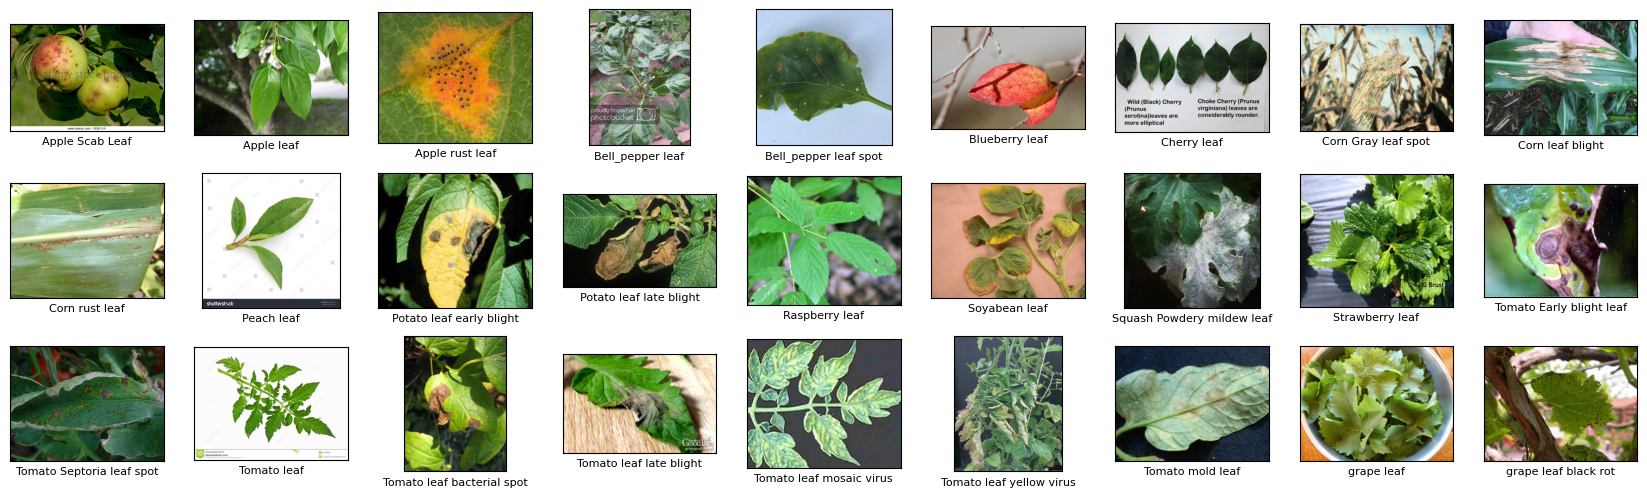

In [ ]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

plt.figure(figsize=(21,6))
for i in range(0, len(CLASS_NAMES)):
    plt.subplot(3,9, i+1)
    img_name = ''.join(random.sample(os.listdir(TRAIN_DIR+CLASS_NAMES[i]),1))
    img = mpimg.imread(os.path.join(TRAIN_DIR, CLASS_NAMES[i],img_name))
    label = CLASS_NAMES[i]
    plt.imshow(img)
    plt.xlabel(label, fontsize=8)
    plt.xticks([])
    plt.yticks([])

### Data Augmentation

In [ ]:
import torchvision.transforms as transforms

#gray_transformation = grayscale_transform = transforms.Grayscale(3)
resize_transformation = transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))
hflip_transformation = transforms.RandomHorizontalFlip(p=1)
vflip_transformation = transforms.RandomVerticalFlip(p=1)
random_rotation_transformation = transforms.RandomRotation(35)
random_perspective_transformation = transforms.RandomPerspective(distortion_scale=0.25, p=1)
gausian_blur_transformation = transforms.GaussianBlur(kernel_size = 3, sigma = (0.5 , 1.5))
gausian_blur_transformation2 = transforms.GaussianBlur(kernel_size = (7,13), sigma = (5 , 8))
colour_jitter_transformation = transforms.ColorJitter(brightness=(0.4),
                                               contrast=(0.4),
                                               saturation=(0.4),
                                               hue=(0))
colour_jitter_transformation_2 = transforms.ColorJitter(brightness=(0.7),contrast=(6),saturation=(0.9),hue=(-0.1,0.1))
normalize_transformation = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225])])
sharpness_transformation = transforms.RandomAdjustSharpness(sharpness_factor=2, p=1)

In [ ]:
from PIL import Image

img_name = os.listdir(TRAIN_DIR+CLASS_NAMES[0])[5]
np_img = mpimg.imread(os.path.join(TRAIN_DIR, CLASS_NAMES[0],img_name))

def trf_img(img):
    orig_img = Image.fromarray(np_img.astype('uint8'), 'RGB')
    #gray_img = grayscale_transform(orig_img)
    resize_img = resize_transformation(orig_img)
    h_img = hflip_transformation(orig_img)
    v_img = vflip_transformation(orig_img)
    rotation_img = random_rotation_transformation(orig_img)
    persp_img = random_perspective_transformation(orig_img)
    gausianblured_img = gausian_blur_transformation(orig_img)
    cjitter_img = colour_jitter_transformation(orig_img)
    normalize_img = normalize_transformation(orig_img)
    sharp_img = sharpness_transformation(orig_img)
    return [orig_img, resize_img, h_img, v_img, rotation_img,
            persp_img, gausianblured_img, cjitter_img, sharp_img]

transform_img = trf_img(np_img)

<ipython-input-8-f4efc1c33e41>:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


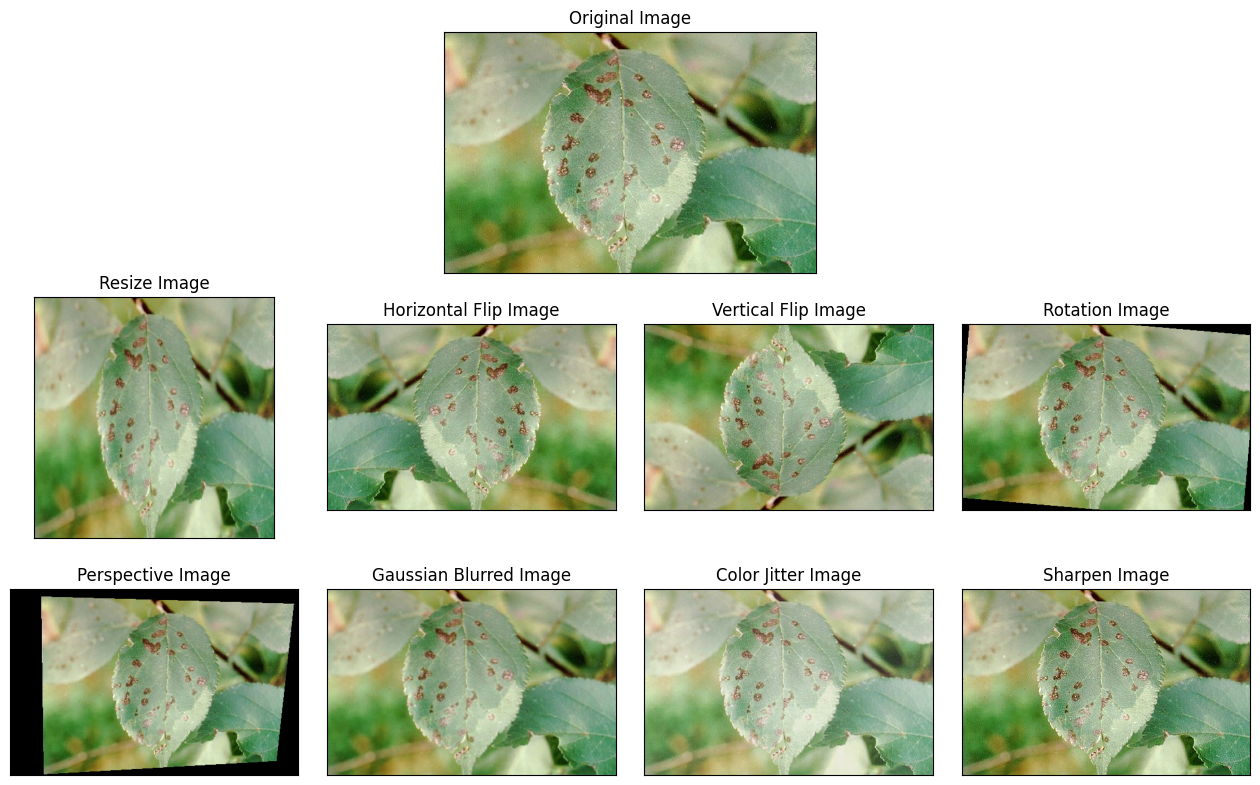

In [ ]:
import matplotlib.gridspec as grd

trf_name = ['Original Image', #'Grayscale Image',
            'Resize Image',
            'Horizontal Flip Image', 'Vertical Flip Image',
            'Rotation Image', 'Perspective Image',
            'Gaussian Blurred Image','Color Jitter Image', 'Sharpen Image']
fig = plt.figure(figsize=(16, 10))
gs = grd.GridSpec(3, 4, wspace=0.1, hspace=0.1)
ax0= fig.add_subplot(gs[0, :])
ax0.imshow(transform_img[0])
ax0.set_title(trf_name[0])
ax0.set_xticks([])
ax0.set_yticks([])
# for i in range(len(transform_img)):
#   if i == 0:
#     ax0= fig.add_subplot(gs[0, :])
#     ax0.imshow(transform_img[0])
#     ax0.set_title(trf_name[i])
#     ax0.set_xticks([])
#     ax0.set_yticks([])
#   else:
#     ax[i]= fig.add_subplot(gs[1, i-1])
#     ax[i].imshow(transform_img[i])
#     ax[i].set_xticks([])
#     ax[i].set_yticks([])

ax1= fig.add_subplot(gs[1, 0])
ax1.set_title(trf_name[1])
ax1.imshow(transform_img[1])
ax1.set_xticks([])
ax1.set_yticks([])

ax2= fig.add_subplot(gs[1, 1])
ax2.set_title(trf_name[2])
ax2.imshow(transform_img[2])
ax2.set_xticks([])
ax2.set_yticks([])

ax3= fig.add_subplot(gs[1, 2])
ax3.set_title(trf_name[3])
ax3.imshow(transform_img[3])
ax3.set_xticks([])
ax3.set_yticks([])

ax4= fig.add_subplot(gs[1, 3])
ax4.set_title(trf_name[4])
ax4.imshow(transform_img[4])
ax4.set_xticks([])
ax4.set_yticks([])

ax5= fig.add_subplot(gs[2, 0])
ax5.set_title(trf_name[5])
ax5.imshow(transform_img[5])
ax5.set_xticks([])
ax5.set_yticks([])

ax6= fig.add_subplot(gs[2, 1])
ax6.set_title(trf_name[6])
ax6.imshow(transform_img[6])
ax6.set_xticks([])
ax6.set_yticks([])

ax7= fig.add_subplot(gs[2, 2])
ax7.set_title(trf_name[7])
ax7.imshow(transform_img[7])
ax7.set_xticks([])
ax7.set_yticks([])

ax8= fig.add_subplot(gs[2, 3])
ax8.set_title(trf_name[8])
ax8.imshow(transform_img[8])
ax8.set_xticks([])
ax8.set_yticks([])
plt.tight_layout()

### Image with Noise

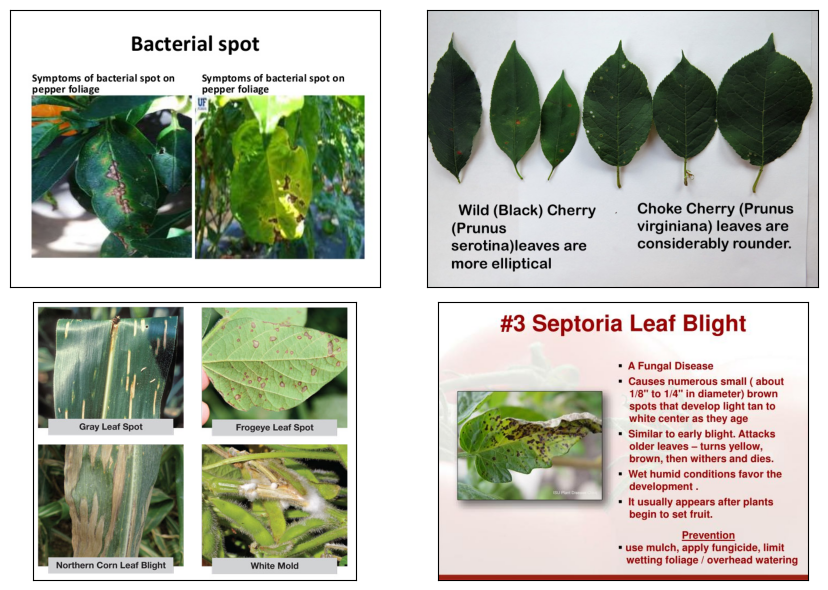

In [ ]:
img_name = ['Bell_pepper leaf spot (3).jpg', 'Cherry leaf (45).jpg', 'Corn Gray leaf spot (27).jpg', 'Tomato Septoria leaf spot (3).jpg']
plt.figure(figsize=(9,6))
for idx, name in enumerate(img_name):
    plt.subplot(2, 2, idx+1 )
    folder_name = name.split(' (')[0]
    img_name = name
    img = mpimg.imread(os.path.join(TRAIN_DIR, folder_name,img_name))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

### Train Data Distributions

In [ ]:
import pandas as pd

plants = os.listdir(TRAIN_DIR)

class_counts = {}
for plant in plants:
    class_counts[plant] = len(os.listdir(os.path.join(TRAIN_DIR, plant)))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(class_counts.values(), index=class_counts.keys(), columns=["no. of images"])
img_per_class

no. of images
Blueberry leaf                        105
Cherry leaf                            47
Corn Gray leaf spot                    64
Corn leaf blight                      180
Corn rust leaf                        106
Peach leaf                            103
Potato leaf early blight              109
Potato leaf late blight                97
Raspberry leaf                        109
Soyabean leaf                          57
Squash Powdery mildew leaf            123
Strawberry leaf                        88
Tomato Early blight leaf               74
Tomato Septoria leaf spot             137
Tomato leaf bacterial spot             98
Tomato leaf late blight               101
Tomato leaf yellow virus               69
Tomato leaf mosaic virus               44
Tomato leaf                            54
grape leaf black rot                   56
Tomato mold leaf                       85
grape leaf                             57
Apple leaf                             82
Apple rust leaf                        79
Apple Scab Leaf                        77
Bell_pepper leaf                       53
Bell_pepper leaf spot                  62

In [ ]:
new_df = img_per_class.reset_index().sort_values(by=['no. of images'])

Text(0.5, 1.0, 'Images per each class of plant/disease')

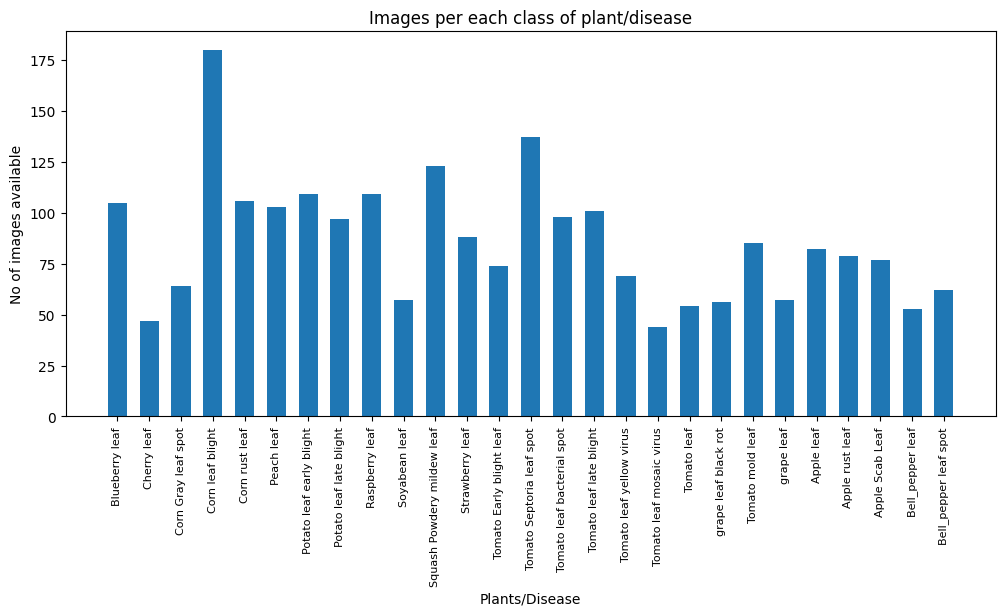

In [ ]:
# plotting number of images available for each disease
index = [n for n in range(len(plants))]
plt.figure(figsize=(12, 5))
plt.bar(index, [n for n in class_counts.values()], width=0.6)
plt.xlabel('Plants/Disease', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, plants, fontsize=8, rotation=90)
plt.title('Images per each class of plant/disease')

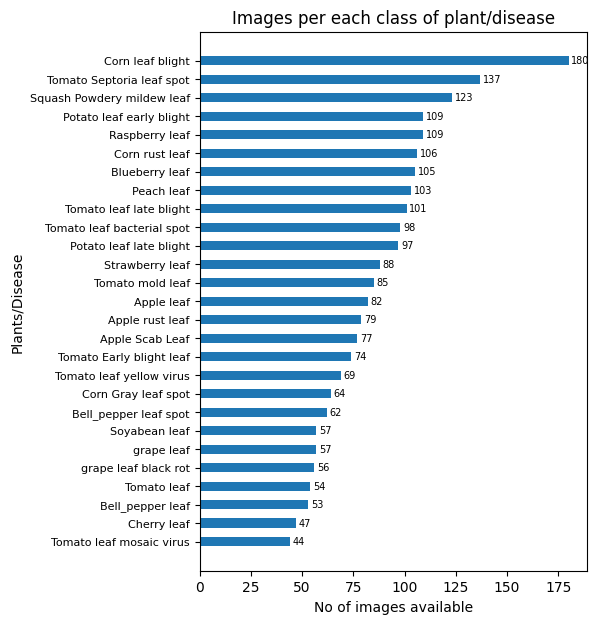

In [ ]:
fig, ax = plt.subplots(figsize=(5, 7))
bars = ax.barh(new_df['index'], new_df['no. of images'], height=0.5)
index = [n for n in range(len(new_df['index']))]
ax.set_ylabel('Plants/Disease')
ax.tick_params(axis= 'y', labelsize=8)
ax.set_title('Images per each class of plant/disease')
ax.set_xlabel('No of images available', fontsize=10)
ax.bar_label(bars, fontsize= 7, padding= 2)
plt.show()

### Test Data Distributions

In [ ]:
import pandas as pd

plants = os.listdir(TEST_DIR)

class_counts = {}
for plant in plants:
    class_counts[plant] = len(os.listdir(os.path.join(TEST_DIR, plant)))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(class_counts.values(), index=class_counts.keys(), columns=["no. of images"])
img_per_class

no. of images
Apple leaf                              9
Apple rust leaf                        10
Apple Scab Leaf                        10
Bell_pepper leaf                        8
Bell_pepper leaf spot                   9
Blueberry leaf                         11
Cherry leaf                            10
Corn Gray leaf spot                     4
Corn leaf blight                       12
Corn rust leaf                         10
grape leaf                             12
grape leaf black rot                    8
Peach leaf                              9
Potato leaf early blight                8
Potato leaf late blight                 8
Raspberry leaf                          7
Soyabean leaf                           8
Squash Powdery mildew leaf              6
Strawberry leaf                         8
Tomato Early blight leaf                9
Tomato leaf                             8
Tomato leaf bacterial spot              9
Tomato leaf late blight                10
Tomato leaf mosaic virus               10
Tomato leaf yellow virus                6
Tomato mold leaf                        6
Tomato Septoria leaf spot              11

In [ ]:
new_df = img_per_class.reset_index().sort_values(by=['no. of images'])

Text(0.5, 1.0, 'Images per each class of plant/disease')

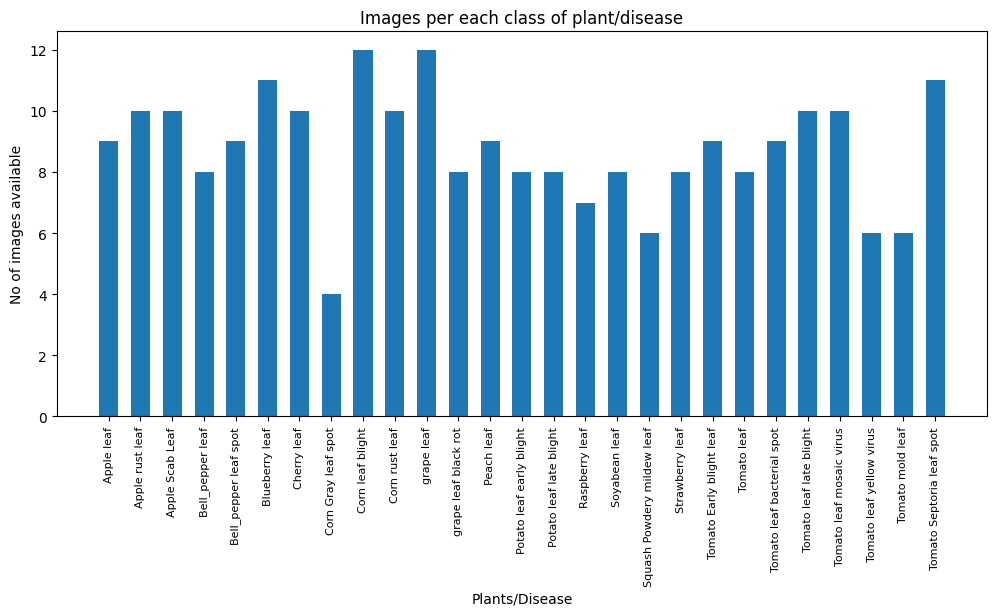

In [ ]:
# plotting number of images available for each disease
index = [n for n in range(len(plants))]
plt.figure(figsize=(12, 5))
plt.bar(index, [n for n in class_counts.values()], width=0.6)
plt.xlabel('Plants/Disease', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, plants, fontsize=8, rotation=90)
plt.title('Images per each class of plant/disease')

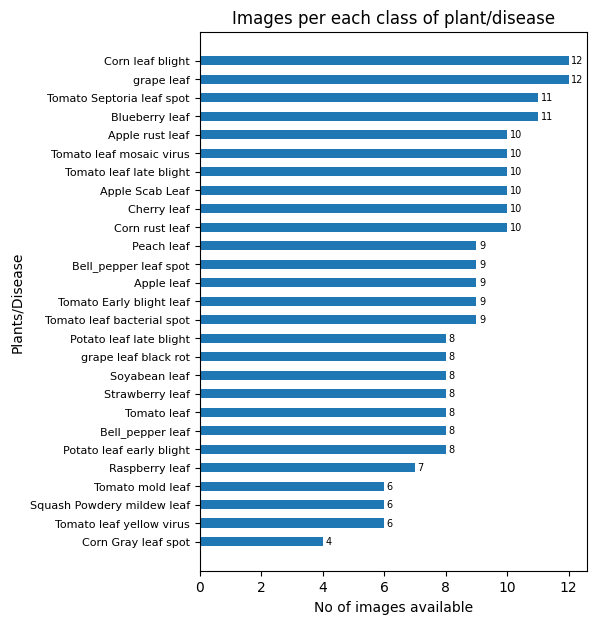

In [ ]:
fig, ax = plt.subplots(figsize=(5, 7))
bars = ax.barh(new_df['index'], new_df['no. of images'], height=0.5)
index = [n for n in range(len(new_df['index']))]
ax.set_ylabel('Plants/Disease')
ax.tick_params(axis= 'y', labelsize=8)
ax.set_title('Images per each class of plant/disease')
ax.set_xlabel('No of images available', fontsize=10)
ax.bar_label(bars, fontsize= 7, padding= 2)
plt.show()

# Data Pre-processing

### Data Cleaning

In [ ]:
# menghapus data dg banyak noise atau data yang tidak valid (yaitu gambar dengan lebih dari satu data kelas)
train_del = {
    'Bell_pepper leaf spot' : ['Bell_pepper leaf spot (3).jpg', 'Bell_pepper leaf spot (4).jpg'],
    'Cherry leaf' : ['Cherry leaf (45).jpg'],
    'Corn Gray leaf spot': ['Corn Gray leaf spot (24).jpg', 'Corn Gray leaf spot (27).jpg', 'Corn Gray leaf spot (31).jpg'],
    'Corn leaf blight' : ['Corn leaf blight (49).jpg', 'Corn leaf blight (99).jpg', 'Corn leaf blight (164).jpg'],
    'Strawberry leaf' : ['Strawberry leaf (6).jpg'],
    'Tomato leaf bacterial spot': ['Tomato leaf bacterial spot (18).jpg', 'Tomato leaf bacterial spot (44).jpg', 'Tomato leaf bacterial spot (45).jpg'],
    'Tomato leaf yellow virus' : ['Tomato leaf yellow virus (51).jpg', 'Tomato leaf yellow virus (63).jpg'],
    'Tomato Septoria leaf spot' : ['Tomato Septoria leaf spot (3).jpg', 'Tomato Septoria leaf spot (111).jpg', 'Tomato Septoria leaf spot (115).jpg'],
}

test_del = {
    'Bell_pepper leaf spot' : ['Bell_pepper leaf spot (3).jpg'],
    'Tomato Early blight leaf' : ['Tomato Early blight leaf (1).jpg'],
    'Tomato leaf bacterial spot' : ['Tomato leaf bacterial spot (1).jpg'],
    'Tomato leaf mosaic virus' : ['Tomato leaf mosaic virus (5).jpg'],
    'Tomato leaf yellow virus' : ['Tomato leaf yellow virus (6).jpg'],
    'Tomato mold leaf' : ['Tomato mold leaf (3).jpg'],
    'Tomato Septoria leaf spot' : ['Tomato Septoria leaf spot (1).jpg']
}

for k in train_del:
    for v in train_del[k]:
        filename = os.path.join(TRAIN_DIR, k, v)
        !rm -rf "$filename"

for k in test_del:
    for v in test_del[k]:
        filename = os.path.join(TEST_DIR, k, v)
        !rm -rf "$filename"

### Data Augmentations

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

def get_train_transform(image_size):
    train_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(35),
        transforms.RandomPerspective(distortion_scale=0.25, p=0.5),
        # transforms.CenterCrop((192, 192)),
        transforms.ColorJitter(brightness=0.4,
                               contrast=0.4,
                               saturation=0.4,
                               hue=0),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.5, 1.5)),
        transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
    ])
    return train_transform

def get_valid_transform(image_size):
    valid_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
    ])
    return valid_transform

### Class Weighting (for imbalanced data)

In [ ]:
plants = os.listdir(TRAIN_DIR)

class_counts = {}
for plant in plants:
    class_counts[plant] = len(os.listdir(os.path.join(TRAIN_DIR, plant)))

class_weights = [1./n for n in class_counts.values()]
class_weights = torch.tensor(class_weights)
class_weights

#Dataset

### Parameters

In [ ]:
VALID_SPLIT = 0.2 # @param {type:"slider", min:0, max:0.5, step:0.05}

train_batch_size = 32 # @param {type:"integer"}

### Datasets and DataLoader

In [ ]:
def get_train_datasets():
    """
    Images with the same class is already grouped in its class folder.
    Therefore, datasets can be generated directly from the ImageFolder function of Dataset class.

    References:
    - https://pytorch.org/vision/stable/datasets.html
    - https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html
    """

    dataset = datasets.ImageFolder(
        TRAIN_DIR,
        transform=(get_train_transform(IMAGE_SIZE))
    )
    dataset_test = datasets.ImageFolder(
        TRAIN_DIR,
        transform=(get_valid_transform(IMAGE_SIZE))
    )

    # split training dataset to training and validation dataset
    dataset_size = len(dataset)
    # Calculate the validation dataset size
    valid_size = int(VALID_SPLIT * dataset_size)
    # Radomize the data indices
    indices = torch.randperm(len(dataset)).tolist()
    # Training and validation sets
    dataset_train = Subset(dataset, indices[:-valid_size])
    dataset_valid = Subset(dataset_test, indices[-valid_size:])

    return dataset_train, dataset_valid, dataset.classes

def get_train_data_loaders(dataset_train, dataset_valid, batch_size):
    train_loader = DataLoader(
        dataset_train, batch_size=batch_size,
        shuffle=True, num_workers=NUM_WORKERS
    )
    valid_loader = DataLoader(
        dataset_valid, batch_size=batch_size,
        shuffle=False, num_workers=NUM_WORKERS
    )

    return train_loader, valid_loader

### Load Data for Training

In [ ]:
# Load datasets.
dataset_train, dataset_valid, dataset_classes = get_train_datasets()

# Load data loaders.
train_loader, valid_loader = get_train_data_loaders(
    dataset_train, dataset_valid, batch_size=train_batch_size
)

print(f"[DATASET] Training data: {len(dataset_train)} images")
print(f"[DATASET] Validation data: {len(dataset_valid)} images\n")
print(f"[DATASET] Class count: {len(dataset_classes)}")
print(f"[DATASET] Class names: {dataset_classes}\n")

[DATASET] Training data: 1839 images
[DATASET] Validation data: 459 images

[DATASET] Class count: 27
[DATASET] Class names: ['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'grape leaf', 'grape leaf black rot']



# Model

### Parameters

In [ ]:
model_name = "resnet50" # @param ["resnet18", "resnet34", "resnet50", "resnet152", "wide_resnet50", "vgg19"]

# dropout setting for final layer
dropout = 0.4 # @param {type:"slider", min:0, max:1, step:0.05}


In [ ]:
# Transfer learning setting
fine_tune = True
# True for fine-tuning all layers
# False for freezing hidden layers

# Device
device = ('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Dropout: {dropout}")
print(f"Transfer learning: {fine_tune}")
print(f"Computation device: {device}")

Dropout: 0.4
Transfer learning: True
Computation device: cuda


### Architecture

In [ ]:
from torchvision import models

import torch.nn as nn

def build_model(model_name='resnet50', fine_tune=True, dropout=0, num_classes=27):
    models_list = {
        'resnet18': models.resnet18(weights='DEFAULT'),
        'resnet34': models.resnet34(weights='DEFAULT'),
        'resnet50': models.resnet50(weights='DEFAULT'),
        'wide_resnet50': models.wide_resnet50_2(weights='DEFAULT'),
        'vgg19': models.vgg19(weights='DEFAULT'),
    }

    model = models_list[model_name]

    if fine_tune:
        print('[INFO]: Fine-tuning all layers...')
        for params in model.parameters():
            params.requires_grad = True
    else:
        print('[INFO]: Freezing hidden layers...')
        for params in model.parameters():
            params.requires_grad = False

    if 'resnet' in model_name:
        # Replace the last fully-connected layer to adapt the model to a new problem with a different number of output classes
        num_ftrs = model.fc.in_features
        # model.fc = nn.Linear(in_features=num_ftrs, out_features=num_classes) # model.fc = nn.Linear(in_features=2048, out_features=num_classes)
        if dropout > 0:
            model.fc = nn.Sequential(
                nn.Dropout(dropout),
                nn.Linear(in_features=num_ftrs, out_features=num_classes)
            )
        else:
            model.fc = nn.Linear(in_features=num_ftrs, out_features=num_classes)
        # https://discuss.pytorch.org/t/resnet-last-layer-modification/33530/2

    elif model_name == 'vgg19':
        last_item_index = len(model.classifier)-1
        old_fc = model.classifier.__getitem__(last_item_index )
        if dropout > 0:
            new_fc = nn.Sequential(
                nn.Dropout(dropout),
                nn.Linear(in_features=old_fc.in_features, out_features= num_classes, bias=True)
            )
        else:
            new_fc = nn.Linear(in_features=old_fc.in_features, out_features= num_classes, bias=True)
        model.classifier.__setitem__(last_item_index , new_fc)

    return model

### Load the Model

In [ ]:
model = build_model(model_name, fine_tune=fine_tune, dropout=dropout, num_classes=len(dataset_classes)).to(device)

print(model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 145MB/s]
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 131MB/s]
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 162MB/s]
Downloading: "https://download.pytorch.org/models/wide_resnet50_2-9ba9bcbe.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-9ba9bcbe.pth
100%|██████████| 263M/263M [00:01<00:00, 138MB/s]
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 76.7MB/s]


[INFO]: Fine-tuning all layers...
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 25

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model, input_size=(train_batch_size, 3, IMAGE_SIZE, IMAGE_SIZE))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [32, 27]                  --
├─Conv2d: 1-1                            [32, 64, 112, 112]        9,408
├─BatchNorm2d: 1-2                       [32, 64, 112, 112]        128
├─ReLU: 1-3                              [32, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [32, 64, 56, 56]          --
├─Sequential: 1-5                        [32, 256, 56, 56]         --
│    └─Bottleneck: 2-1                   [32, 256, 56, 56]         --
│    │    └─Conv2d: 3-1                  [32, 64, 56, 56]          4,096
│    │    └─BatchNorm2d: 3-2             [32, 64, 56, 56]          128
│    │    └─ReLU: 3-3                    [32, 64, 56, 56]          --
│    │    └─Conv2d: 3-4                  [32, 64, 56, 56]          36,864
│    │    └─BatchNorm2d: 3-5             [32, 64, 56, 56]          128
│    │    └─ReLU: 3-6                    [32, 64, 56, 56]          --
│ 

In [ ]:
# Total parameters and trainable parameters.
total_params = sum(p.numel() for p in model.parameters())
print(f"[MODEL] {total_params:,} total parameters.")

total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"[MODEL] {total_trainable_params:,} trainable parameters.")

[MODEL] 23,563,355 total parameters.
[MODEL] 23,563,355 trainable parameters.


# Training

### Parameters

In [ ]:
import torch.optim as optim

epochs = 30 # @param {type:"integer"}

learning_rate = 0.001 # @param {type:"number"}

opt_type = "SGD" # @param ["SGD", "Adam"]

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) if opt_type == 'SGD' else optim.Adam(params=model.parameters(), lr=learning_rate)


# The most common hyperparameters for the Adam optimizer
# - params (iterable) – iterable of parameters to optimize or dicts defining parameter groups
# - Learning rate (lr): controls the step size at each iteration during gradient descent. Default: 1e-3
#   A more significant learning rate can help the optimizer converge faster but may also cause it to overshoot the optimal solution.
# - Beta1 (beta_1): controls the exponential decay rate for the first moment estimates. Default: 0.9
#   It is typically set to 0.9 but can be adjusted to a trade-off between stability and responsiveness.
# - Beta2 (beta_2): controls the exponential decay rate for the second-moment estimates. Default: 0.999
#   It is typically set to 0.999 but can be adjusted to a trade-off between stability and responsiveness.
# - Epsilon (epsilon): a small constant added to the denominator to avoid division by zero. Default: 1e-08
# - Decay (decay): controls the learning rate decay over time.
#   It is typically set to 0, meaning the learning rate remains constant.

# References:
# https://pytorch.org/docs/stable/generated/torch.optim.Adam.html
# https://www.analyticsvidhya.com/blog/2023/12/adam-optimizer/
# https://www.kdnuggets.com/2022/12/tuning-adam-optimizer-parameters-pytorch.html

In [ ]:
# Scheduler

use_scheduler = False # @param {type:"boolean"}

# if use StepLR:
epoch_to_update = 5 # @param {type:"integer"}
step_size = epoch_to_update * len(dataset_train)/train_batch_size

gamma = 0.9 # @param {type:"number"}

# if use OneCycleLR:
# max_learning_rate = 0.01 # @param {type:"number"}

scheduler = None
if use_scheduler:
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    # scheduler = torch.optim.lr_scheduler.OneCycleLR(
    #    optimizer, max_lr=max_learning_rate, steps_per_epoch=len(train_loader), epochs=epochs)


In [ ]:
print(f"[PARAMETER] Epochs: {epochs}")
print(f"[PARAMETER] Learning rate: {learning_rate}\n")
print(f"[PARAMETER] Optimizer: {optimizer}\n")

print(f"[SCHEDULER] Scheduler: {scheduler.state_dict() if use_scheduler else None}\n")

[PARAMETER] Epochs: 30
[PARAMETER] Learning rate: 0.001

[PARAMETER] Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

[SCHEDULER] Scheduler: None



### Directory for Outputs

In [ ]:
from datetime import datetime
import pytz

tz_jkt = pytz.timezone('Asia/Jakarta')
now_jkt = datetime.now(tz_jkt)
dt_str = now_jkt.strftime("%y-%m-%d_%H.%M")

# Create a directory with the model name for outputs.
out_dir = os.path.join(f'/content/drive/MyDrive/ai_ind_cv/ta/outputs/{dt_str}', model_name)

os.makedirs(out_dir, exist_ok=True)

### Utilities

In [ ]:
matplotlib.style.use('ggplot')

class SaveBestModel:
    """
    Class to save the best model while training. If the current epoch's
    validation loss is less than the previous least less, then save the
    model state.
    """
    def __init__(self, best_valid_loss=float('inf'), best_valid_acc=float('inf'), best_train_loss=float('inf'), best_train_acc=float('inf'), best_epoch=0):
        self.best_valid_loss = best_valid_loss
        self.best_valid_acc = best_valid_acc
        self.best_train_loss = best_train_loss
        self.best_train_acc = best_train_acc
        self.best_epoch = best_epoch

    def __call__(self, current_valid_loss, current_valid_acc, current_train_loss, current_train_acc, epoch, model, out_dir):
        if current_valid_loss < self.best_valid_loss:
            self.best_valid_loss = current_valid_loss
            self.best_valid_acc = current_valid_acc
            self.best_train_loss = current_train_loss
            self.best_train_acc = current_train_acc
            self.best_epoch = epoch
            print(f"\nBest validation loss: {self.best_valid_loss}")
            print(f"\nSaving best model for epoch: {epoch+1}\n")
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                }, os.path.join(out_dir, 'best_model.pth'))

def save_model(epochs, model, optimizer, criterion, out_dir):
    """
    Function to save the trained model to disk.
    """
    torch.save({
                'epoch': epochs,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': criterion,
                }, os.path.join(out_dir, 'model.pth'))

def save_plots(train_acc, valid_acc, train_loss, valid_loss, out_dir):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # Accuracy plots.
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_acc, color='tab:blue', linestyle='-',
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='tab:red', linestyle='-',
        label='validation accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(os.path.join(out_dir, 'accuracy.png'))

    # Loss plots.
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_loss, color='tab:blue', linestyle='-',
        label='train loss'
    )
    plt.plot(
        valid_loss, color='tab:red', linestyle='-',
        label='validation loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(os.path.join(out_dir, 'loss.png'))

### Training & Validation Function

In [ ]:
from tqdm.auto import tqdm

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = True

# Training function.
def train(model, trainloader, optimizer, criterion, scheduler=None): # def train(model, trainloader, optimizer, criterion, scheduler = None):
    model.train()
    print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        counter += 1
        image, labels = data
        image = image.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # Forward pass.
        outputs = model(image)
        # Calculate the loss.
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()
        # Calculate the accuracy.
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        # Backpropagation.
        loss.backward()
        # Update the weights.
        optimizer.step()

        # Update learning rate melalui scheduler
        # scheduler.step() dipanggil setelah optimizer.step() dipanggil terlebih dahulu
        if scheduler is not None:
            scheduler.step()
            # print(scheduler.get_last_lr())

    # Loss and accuracy for the complete epoch.
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc

# Validation function.
def validate(model, testloader, criterion, class_names):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0

    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1

            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # Forward pass.
            outputs = model(image)
            # Calculate the loss.
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # Calculate the accuracy.
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()

    # Loss and accuracy for the complete epoch.
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))
    return epoch_loss, epoch_acc

### Train

In [ ]:
# Loss function
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device), reduction='mean') # class weights added here

# Initialize 'SaveBestModel' class.
save_best_model = SaveBestModel()

# Lists to keep track of losses and accuracies.
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []

# Start the training.
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(model, train_loader,
                                              optimizer, criterion, scheduler)
    valid_epoch_loss, valid_epoch_acc = validate(model, valid_loader,
                                                 criterion, dataset_classes)

    # Note:
    # Selain dalam bagian def train(), scheduler bisa juga ditempatkan di sini
    # if scheduler is not None:
        # scheduler.step()
        # print(f'\nLR: {scheduler.get_last_lr()}\n') #get current learning rate

    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"[TRAINING] loss: {train_epoch_loss:.3f}, acc: {train_epoch_acc:.3f}")
    print(f"[VALIDATION] loss: {valid_epoch_loss:.3f}, acc: {valid_epoch_acc:.3f}")
    save_best_model(valid_epoch_loss, valid_epoch_acc, train_epoch_loss, train_epoch_acc, epoch, model, out_dir)
    print('-'*50 + '\n')

print('TRAINING COMPLETE')

[INFO]: Epoch 1 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 3.249, acc: 7.069
[VALIDATION] loss: 3.156, acc: 14.597

Best validation loss: 3.1556331634521486

Saving best model for epoch: 1

--------------------------------------------------

[INFO]: Epoch 2 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 3.085, acc: 15.280
[VALIDATION] loss: 2.955, acc: 20.697

Best validation loss: 2.9547043323516844

Saving best model for epoch: 2

--------------------------------------------------

[INFO]: Epoch 3 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 2.837, acc: 21.805
[VALIDATION] loss: 2.652, acc: 31.590

Best validation loss: 2.65246688524882

Saving best model for epoch: 3

--------------------------------------------------

[INFO]: Epoch 4 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 2.500, acc: 30.071
[VALIDATION] loss: 2.342, acc: 38.126

Best validation loss: 2.342380738258362

Saving best model for epoch: 4

--------------------------------------------------

[INFO]: Epoch 5 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 2.208, acc: 36.868
[VALIDATION] loss: 2.061, acc: 45.098

Best validation loss: 2.061407701174418

Saving best model for epoch: 5

--------------------------------------------------

[INFO]: Epoch 6 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 1.974, acc: 41.979
[VALIDATION] loss: 1.838, acc: 47.277

Best validation loss: 1.8379172086715698

Saving best model for epoch: 6

--------------------------------------------------

[INFO]: Epoch 7 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 1.760, acc: 46.982
[VALIDATION] loss: 1.666, acc: 53.377

Best validation loss: 1.6662712415059409

Saving best model for epoch: 7

--------------------------------------------------

[INFO]: Epoch 8 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 1.591, acc: 50.190
[VALIDATION] loss: 1.578, acc: 53.595

Best validation loss: 1.5784285068511963

Saving best model for epoch: 8

--------------------------------------------------

[INFO]: Epoch 9 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 1.444, acc: 55.465
[VALIDATION] loss: 1.452, acc: 57.298

Best validation loss: 1.4522803544998169

Saving best model for epoch: 9

--------------------------------------------------

[INFO]: Epoch 10 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 1.347, acc: 58.129
[VALIDATION] loss: 1.372, acc: 57.952

Best validation loss: 1.372418967882792

Saving best model for epoch: 10

--------------------------------------------------

[INFO]: Epoch 11 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 1.234, acc: 61.175
[VALIDATION] loss: 1.311, acc: 60.349

Best validation loss: 1.3112852255503336

Saving best model for epoch: 11

--------------------------------------------------

[INFO]: Epoch 12 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 1.135, acc: 64.057
[VALIDATION] loss: 1.230, acc: 59.259

Best validation loss: 1.2295073787371318

Saving best model for epoch: 12

--------------------------------------------------

[INFO]: Epoch 13 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 1.078, acc: 66.014
[VALIDATION] loss: 1.185, acc: 61.002

Best validation loss: 1.1853880047798158

Saving best model for epoch: 13

--------------------------------------------------

[INFO]: Epoch 14 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 1.019, acc: 67.102
[VALIDATION] loss: 1.174, acc: 62.745

Best validation loss: 1.1744094014167785

Saving best model for epoch: 14

--------------------------------------------------

[INFO]: Epoch 15 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.922, acc: 70.745
[VALIDATION] loss: 1.149, acc: 62.092

Best validation loss: 1.1487942775090536

Saving best model for epoch: 15

--------------------------------------------------

[INFO]: Epoch 16 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.908, acc: 70.691
[VALIDATION] loss: 1.134, acc: 63.399

Best validation loss: 1.1337321599324544

Saving best model for epoch: 16

--------------------------------------------------

[INFO]: Epoch 17 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.853, acc: 72.322
[VALIDATION] loss: 1.108, acc: 63.617

Best validation loss: 1.1082565665245057

Saving best model for epoch: 17

--------------------------------------------------

[INFO]: Epoch 18 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.782, acc: 75.367
[VALIDATION] loss: 1.105, acc: 64.270

Best validation loss: 1.1045605063438415

Saving best model for epoch: 18

--------------------------------------------------

[INFO]: Epoch 19 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.742, acc: 74.660
[VALIDATION] loss: 1.120, acc: 64.706
--------------------------------------------------

[INFO]: Epoch 20 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.696, acc: 77.325
[VALIDATION] loss: 1.149, acc: 65.142
--------------------------------------------------

[INFO]: Epoch 21 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.659, acc: 79.065
[VALIDATION] loss: 1.101, acc: 64.924

Best validation loss: 1.100541388988495

Saving best model for epoch: 21

--------------------------------------------------

[INFO]: Epoch 22 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.623, acc: 80.696
[VALIDATION] loss: 1.088, acc: 64.706

Best validation loss: 1.0878440896670023

Saving best model for epoch: 22

--------------------------------------------------

[INFO]: Epoch 23 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.587, acc: 81.294
[VALIDATION] loss: 1.115, acc: 66.013
--------------------------------------------------

[INFO]: Epoch 24 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.546, acc: 81.512
[VALIDATION] loss: 1.180, acc: 63.617
--------------------------------------------------

[INFO]: Epoch 25 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.510, acc: 83.252
[VALIDATION] loss: 1.104, acc: 66.231
--------------------------------------------------

[INFO]: Epoch 26 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.522, acc: 83.034
[VALIDATION] loss: 1.133, acc: 65.795
--------------------------------------------------

[INFO]: Epoch 27 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.484, acc: 84.231
[VALIDATION] loss: 1.152, acc: 66.667
--------------------------------------------------

[INFO]: Epoch 28 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.469, acc: 85.155
[VALIDATION] loss: 1.113, acc: 65.142
--------------------------------------------------

[INFO]: Epoch 29 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.436, acc: 85.427
[VALIDATION] loss: 1.138, acc: 64.924
--------------------------------------------------

[INFO]: Epoch 30 of 30
Training


  0%|          | 0/58 [00:00<?, ?it/s]

Validation


  0%|          | 0/15 [00:00<?, ?it/s]

[TRAINING] loss: 0.399, acc: 87.493
[VALIDATION] loss: 1.155, acc: 65.795
--------------------------------------------------

TRAINING COMPLETE


In [ ]:
print('TRAINING RESULTS')
print(f"[EPOCH] best epoch: {save_best_model.best_epoch}")
print(f"[TRAINING] loss: {save_best_model.best_train_loss:.3f}, acc: {save_best_model.best_train_acc:.3f}")
print(f"[VALIDATION] loss: {save_best_model.best_valid_loss:.3f}, acc: {save_best_model.best_valid_acc:.3f}")

TRAINING RESULTS
[EPOCH] best epoch: 21
[TRAINING] loss: 0.623, acc: 80.696
[VALIDATION] loss: 1.088, acc: 64.706


### Saving Result

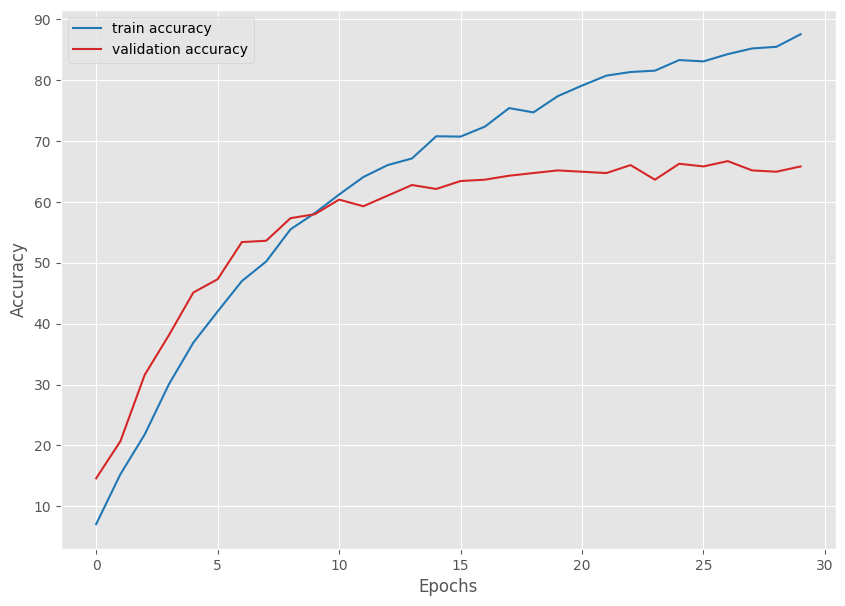

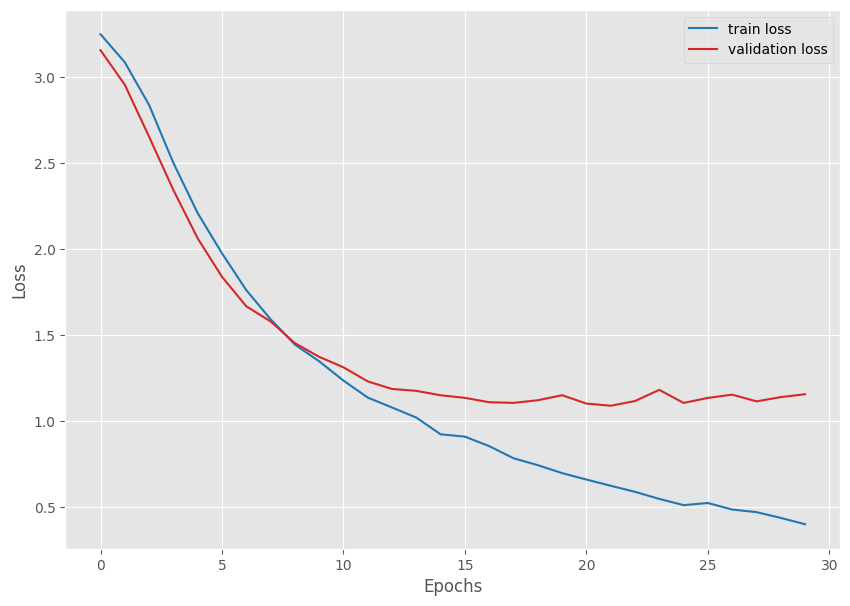

In [ ]:
# Save the trained model weights.
save_model(epochs, model, optimizer, criterion, out_dir)
# Save the loss and accuracy plots.
save_plots(train_acc, valid_acc, train_loss, valid_loss, out_dir)

# Testing

In [ ]:
# check current folder & model
print(dt_str, model_name)

24-02-12_04.56 resnet50


In [ ]:
"""
############################################################################
# Jika diperlukan untuk menjalankan testing manual (tanpa menjalankan proses training di atas)...
# Un-comment cell ini
# dan atur nilai 'dt_str' dan 'model_name'
# sesuai dengan folder yang akan dijalankan
############################################################################

dt_str = '24-02-07_04.53' # ubah folder target di sini
model_name = 'resnet152' # sesuaikan nama modelnya

import torch
import os
import torch.nn as nn
from torchvision import models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from tqdm.auto import tqdm

TEST_DIR = '/content/drive/MyDrive/ai_ind_cv/ta/input_clear/PlantDoc-Dataset/test/'
IMAGE_SIZE = 224
NUM_WORKERS = 2

CLASS_NAMES = [
    'Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf',
    'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot',
    'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight',
    'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf',
    'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf',
    'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot',
    'Tomato leaf late blight', 'Tomato leaf mosaic virus',
    'Tomato leaf yellow virus', 'Tomato mold leaf', 'grape leaf', 'grape leaf black rot'
]

def build_model(model_name='resnet50', fine_tune=True, dropout=0, num_classes=27):
    models_list = {
        'resnet50': models.resnet50(weights='DEFAULT'),
        'wide_resnet50': models.wide_resnet50_2(weights='DEFAULT'),
    }

    model = models_list[model_name]

    if fine_tune:
        print('[INFO]: Fine-tuning all layers...')
        for params in model.parameters():
            params.requires_grad = True
    else:
        print('[INFO]: Freezing hidden layers...')
        for params in model.parameters():
            params.requires_grad = False

    if 'resnet' in model_name:
        # Replace the last fully-connected layer to adapt the model to a new problem with a different number of output classes
        num_ftrs = model.fc.in_features
        # model.fc = nn.Linear(in_features=num_ftrs, out_features=num_classes) # model.fc = nn.Linear(in_features=2048, out_features=num_classes)
        if dropout > 0:
            model.fc = nn.Sequential(
                nn.Dropout(dropout),
                nn.Linear(in_features=num_ftrs, out_features=num_classes)
            )
        else:
            model.fc = nn.Linear(in_features=num_ftrs, out_features=num_classes)
        # https://discuss.pytorch.org/t/resnet-last-layer-modification/33530/2

    elif model_name == 'vgg19':
        last_item_index = len(model.classifier)-1
        old_fc = model.classifier.__getitem__(last_item_index )
        if dropout > 0:
            new_fc = nn.Sequential(
                nn.Dropout(dropout),
                nn.Linear(in_features=old_fc.in_features, out_features= num_classes, bias=True)
            )
        else:
            new_fc = nn.Linear(in_features=old_fc.in_features, out_features= num_classes, bias=True)
        model.classifier.__setitem__(last_item_index , new_fc)

    return model
"""

"\n############################################################################\n# Jika diperlukan untuk menjalankan testing manual (tanpa menjalankan proses training di atas)...\n# Un-comment cell ini\n# dan atur nilai 'dt_str' dan 'model_name'\n# sesuai dengan folder yang akan dijalankan\n############################################################################\n\ndt_str = '24-02-07_04.53' # ubah folder target di sini\nmodel_name = 'resnet152' # sesuaikan nama modelnya\n\nimport torch\nimport os\nimport torch.nn as nn\nfrom torchvision import models\nfrom torchvision import datasets, transforms\nfrom torch.utils.data import DataLoader, Subset\nfrom tqdm.auto import tqdm\n\nTEST_DIR = '/content/drive/MyDrive/ai_ind_cv/ta/input_clear/PlantDoc-Dataset/test/'\nIMAGE_SIZE = 224\nNUM_WORKERS = 2\n\nCLASS_NAMES = [\n    'Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf',\n    'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot',\n    'Corn l

### Parameters

In [ ]:
import pathlib

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

best_model_weights = f'/content/drive/MyDrive/ai_ind_cv/ta/outputs/{dt_str}/{model_name}/best_model.pth'
weights_path = pathlib.Path(best_model_weights)
checkpoint = torch.load(weights_path)

### Directory for Outputs

In [ ]:
#model_name = str(weights_path).split(os.path.sep)[-2]

test_result_save_dir = os.path.join(
    f'/content/drive/MyDrive/ai_ind_cv/ta/outputs/{dt_str}/test_results', model_name
)
os.makedirs(test_result_save_dir, exist_ok=True)

### Utilities

In [ ]:
import numpy as np
import cv2

def denormalize(
    x,
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
):
    for t, m, s in zip(x, mean, std):
        t.mul_(s).add_(m)
    return torch.clamp(x, 0, 1)

def save_test_results(
    tensor,
    target,
    output_class,
    counter,
    test_result_save_dir
):
    """
    This function will save a few test images along with the
    ground truth label and predicted label annotated on the image.

    :param tensor: The image tensor.
    :param target: The ground truth class number.
    :param output_class: The predicted class number.
    :param counter: The test image number.
    """
    image = denormalize(tensor).cpu()
    image = image.squeeze(0).permute((1, 2, 0)).numpy()
    image = np.ascontiguousarray(image, dtype=np.float32)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    gt = target.cpu().numpy()

    # Enlarge the image a bit to accomodate for the large class names.
    image = cv2.resize(image, (384, 384))
    cv2.putText(
        image, f"GT: {CLASS_NAMES[int(gt)]}",
        (5, 25),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.8,
        (0, 255, 0),
        2,
        cv2.LINE_AA
    )
    if output_class == gt:
        color = (0, 255, 0)
    else:
        color = (0, 0, 255)
    cv2.putText(
        image, f"Pred: {CLASS_NAMES[int(output_class)]}",
        (5, 55),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.8,
        color,
        2,
        cv2.LINE_AA
    )
    cv2.imwrite(
        os.path.join(test_result_save_dir, 'test_image_'+str(counter)+'.png'),
        image*255.
    )

### DataTransformation

In [ ]:
def get_test_transform(image_size):
    test_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
    ])
    return test_transform

### Datasets

In [ ]:
test_batch_size = 1

def get_test_datasets(image_size):
    dataset_test = datasets.ImageFolder(
        TEST_DIR,
        transform=(get_test_transform(image_size))
    )
    return dataset_test

def get_test_data_loader(dataset_test):
    test_loader = DataLoader(
        dataset_test, batch_size=test_batch_size,
        shuffle=False, num_workers=NUM_WORKERS
    )
    return test_loader

In [ ]:
dataset_test = get_test_datasets(IMAGE_SIZE)
test_loader = get_test_data_loader(dataset_test)

print(f"[DATASET] Testing data: {len(dataset_test)} images")

[DATASET] Testing data: 229 images


### Load the Model

In [ ]:
# check folder & model
print(dt_str, model_name)

24-02-12_04.56 resnet50


In [ ]:
best_model_weights = f'/content/drive/MyDrive/ai_ind_cv/ta/outputs/{dt_str}/{model_name}/best_model.pth'
weights_path = pathlib.Path(best_model_weights)
checkpoint = torch.load(weights_path)

In [ ]:
load_model = build_model(model_name, fine_tune=False, dropout=dropout, num_classes=len(CLASS_NAMES)).to(DEVICE)
load_model.load_state_dict(checkpoint['model_state_dict'])

[INFO]: Freezing hidden layers...


<All keys matched successfully>

### Test Function

In [ ]:
def test(model, testloader, device, test_result_save_dir):
    """
    Returns:
        predictions_list: List containing all the predicted class numbers.
        ground_truth_list: List containing all the ground truth class numbers.
        acc: The test accuracy.
    """

    model.eval()
    """
    References: https://pytorch.org/tutorials/beginner/saving_loading_models.html
    Call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference.
    Failing to do this will yield inconsistent inference results.
    ----------------------------------------------------------------------------
    References: https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch
    model.eval()
    Sets model in evaluation (inference) mode:
    • normalisation layers use running statistics
    • de-activates Dropout layers
    Equivalent to model.train(False)

    model.train()
    Sets model in training mode:
    • normalisation layers1 use per-batch statistics
    • activates Dropout layers2
    """

    print('Testing model')
    predictions_list = []
    ground_truth_list = []
    test_running_correct = 0
    counter = 0

    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1
            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # Forward pass.
            outputs = model(image)
            # Append the GT and predictions to the respective lists.
            ground_truth_list.append(labels.cpu().numpy())
            # Calculate the accuracy.
            _, preds = torch.max(outputs, 1)
            test_running_correct += (preds == labels).sum().item()
            predictions_list.append(preds.cpu().numpy())
            save_test_results(
                image,
                labels,
                preds.cpu().numpy(),
                counter,
                test_result_save_dir
            )

    acc = 100. * (test_running_correct / len(testloader.dataset))
    return predictions_list, ground_truth_list, acc

### Test

In [ ]:
predictions_list, ground_truth_list, acc = test(
    load_model,
    test_loader,
    DEVICE,
    test_result_save_dir
)
print(f"[TESTING] accuracy: {acc:.3f}%")

Testing model


  0%|          | 0/229 [00:00<?, ?it/s]

[TESTING] accuracy: 62.009%


# Inferences

In [ ]:
#model_name = str(weights_path).split(os.path.sep)[-2]

infer_result_path = os.path.join(
    f'/content/drive/MyDrive/ai_ind_cv/ta/outputs/{dt_str}/inference_results', model_name
)
os.makedirs(infer_result_path, exist_ok=True)

### Utilities

In [ ]:
import torch.nn.functional as F
import glob

def annotate_image(image, output_class):
    image = denormalize(image).cpu()
    image = image.squeeze(0).permute((1, 2, 0)).numpy()
    image = np.ascontiguousarray(image, dtype=np.float32)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    class_name = CLASS_NAMES[int(output_class)]
    plant_name = class_name.split(' ')[0]
    disease_name = ' '.join(class_name.split(' ')[1:])

    rectangle_bgr = (255, 255, 255)
    thickness = 1
    alpha = 0.2  # Transparency factor.

    font1 = cv2.FONT_HERSHEY_DUPLEX
    scale1 = 0.8
    x1, y1 = 5, 25
    w1, h1 = cv2.getTextSize(plant_name, font1, fontScale=scale1, thickness=thickness)[0]

    b1_start = (x1-2, y1+2)
    b1_end = (x1 + w1 + 2, y1 - h1 - 2)
    overlay = image.copy()
    cv2.rectangle(overlay, b1_start, b1_end, (0, 200, 0), cv2.FILLED)
    image_new = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)

    font2 = cv2.FONT_HERSHEY_PLAIN
    scale2 = 1.0
    x2, y2 = 5, 45
    w2, h2 = cv2.getTextSize(disease_name, font2, fontScale=scale2, thickness=thickness)[0]

    b2_start = (x2-2, y2+2)
    b2_end = (x2 + w2 + 2, y2 - h2 - 2)
    overlay = image_new.copy()
    cv2.rectangle(overlay, b2_start, b2_end, (0, 200, 125), cv2.FILLED)
    image_new = cv2.addWeighted(overlay, alpha, image_new, 1 - alpha, 0)

    cv2.putText(
        image_new, plant_name, (x1, y1),
        cv2.FONT_HERSHEY_DUPLEX, scale1, (255, 0, 0), thickness,
        lineType=cv2.LINE_AA
    )

    cv2.putText(
        image_new, disease_name, (5, 45),
        cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 0), 1,
        lineType=cv2.LINE_AA
    )

    return image_new

### Transform

In [ ]:
def get_inference_transform(image_size):
    inference_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
    ])
    return inference_transform

### Inferences Function

In [ ]:
def inference(model, testloader, DEVICE):
    model.eval()
    counter = 0
    with torch.no_grad():
        counter += 1
        image = testloader
        image = image.to(DEVICE)

        # Forward pass.
        outputs = model(image)

    # Softmax probabilities.
    predictions = F.softmax(outputs, dim=1).cpu().numpy()

    # Predicted class number.
    output_class = np.argmax(predictions)

    # Show and save the results.
    result = annotate_image(image, output_class)
    return result

### Load the Model

In [ ]:
load_model = build_model(model_name, fine_tune=False, dropout=dropout, num_classes=len(CLASS_NAMES)).to(DEVICE)

load_model.load_state_dict(checkpoint['model_state_dict'])

[INFO]: Freezing hidden layers...


<All keys matched successfully>

### Inferences

Image: pot_late_blight.jpeg


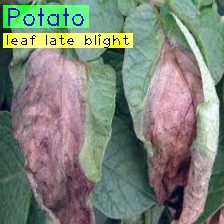



Image: tom_mold_leaf.jpeg


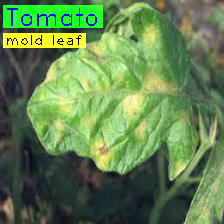



Image: bellp_sp.jpeg


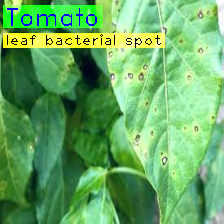



Image: sq_powd_mildew.jpeg


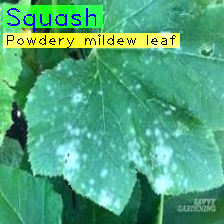



Image: tom_bact_sp.jpeg


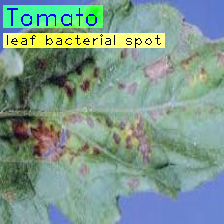



Image: tom_mos_vir.jpeg


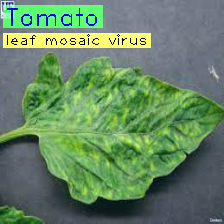



Image: gr_black_rot.jpeg


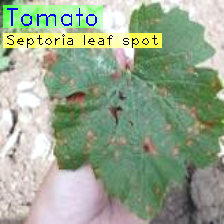



Image: co_gray_sp.jpg


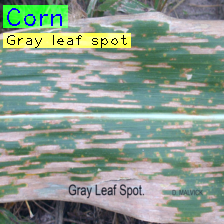



Image: ap_sc.jpeg


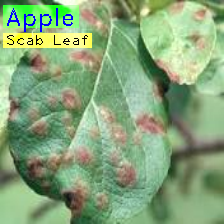



Image: ap_rus.jpeg


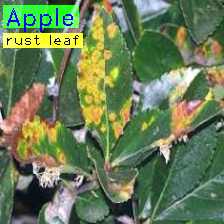



Image: co_rus.jpeg


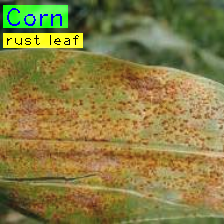



Image: co_bli.jpg


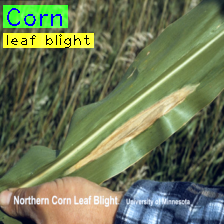

In [ ]:
from google.colab.patches import cv2_imshow

inference_image_paths = glob.glob(os.path.join('/content/drive/MyDrive/ai_ind_cv/ta/input_clear', 'inference_data', '*'))

transform = get_inference_transform(IMAGE_SIZE)

for i, image_path in enumerate(inference_image_paths):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = transform(image)
    image = torch.unsqueeze(image, 0)
    result = inference(load_model, image, DEVICE)

    # Save the image to disk.
    image_name = image_path.split(os.path.sep)[-1]
    print(f"Image: {image_name}")
    cv2_imshow(result*255.)
    print(f"\n")

    cv2.waitKey(1)
    cv2.imwrite(
        os.path.join(infer_result_path, image_name), result*255.
    )

# Summary

In [ ]:
len_train = f"Number of training data: {len(dataset_train)}"
len_val = f"Number of validation data: {len(dataset_valid)}"
len_test = f"Number of testing data: {len(dataset_test)}"
cls_count = f"Class count: {len(dataset_classes)}"
cls_names = f"Class names: {dataset_classes}"

model_name = f"Model: {model_name}"
dout = f"Dropout: {dropout}"
epoch = f"Epochs: {epochs}"
lr = f"Learning rate: {learning_rate}"
opt = f"Optimizer: {optimizer}"

best_epoch = f"Best epoch: {save_best_model.best_epoch}"
best_training_loss = f"Best training loss: {save_best_model.best_train_loss:.3f}"
best_training_acc = f"Best training accuracy: {save_best_model.best_train_acc:.3f}"
best_validation_loss = f"Best validation loss: {save_best_model.best_valid_loss:.3f}"
best_validation_acc = f"Best validation accuracy: {save_best_model.best_valid_acc:.3f}"

testing_acc = f"Testing accuracy: {acc:.3f}"

print(f'Experiment Summary\n')
print(f'Date: {dt_str}\n\n')

print('-'*50 + '\n')
print('Dataset\n')
print('-'*50 + '\n')
print(f'{len_train}\n')
print(f'{len_val}\n')
print(f'{len_test}\n\n')
print(f'{cls_count}\n')
print(f'{cls_names}\n\n')

print('-'*50 + '\n')
print('Training Settings\n')
print('-'*50 + '\n')
print(f'{model_name}\n')
print(f'{dout}\n')
print(f'{epoch}\n')
print(f'{lr}\n\n')
print(f'{opt}\n\n')

print('-'*50 + '\n')
print('Training Results\n')
print('-'*50 + '\n')
print(f'{best_epoch}\n')
print(f'{best_training_loss}\n')
print(f'{best_training_acc}\n')
print(f'{best_validation_loss}\n')
print(f'{best_validation_acc}\n')
print(f'{testing_acc}\n')

fname = f'/content/drive/MyDrive/ai_ind_cv/ta/outputs/{dt_str}/{dt_str}_summary.txt'

with open(fname, mode="wt") as f:
    f.write(f'Experiment Summary\n')
    f.write(f'Date: {dt_str}\n\n')

    f.write('-'*50 + '\n')
    f.write('Dataset\n')
    f.write('-'*50 + '\n')
    f.write(f'{len_train}\n')
    f.write(f'{len_val}\n')
    f.write(f'{len_test}\n\n')
    f.write(f'{cls_count}\n')
    f.write(f'{cls_names}\n\n')

    f.write('-'*50 + '\n')
    f.write('Training Settings\n')
    f.write('-'*50 + '\n')
    f.write(f'{model_name}\n')
    f.write(f'{dout}\n')
    f.write(f'{epoch}\n')
    f.write(f'{lr}\n\n')
    f.write(f'{opt}\n\n')

    f.write('-'*50 + '\n')
    f.write('Training Results\n')
    f.write('-'*50 + '\n')
    f.write(f'{best_epoch}\n')
    f.write(f'{best_training_loss}\n')
    f.write(f'{best_training_acc}\n')
    f.write(f'{best_validation_loss}\n')
    f.write(f'{best_validation_acc}\n')
    f.write(f'{testing_acc}\n')

Experiment Summary

Date: 24-02-12_04.56


--------------------------------------------------

Dataset

--------------------------------------------------

Number of training data: 1839

Number of validation data: 459

Number of testing data: 229


Class count: 27

Class names: ['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'grape leaf', 'grape leaf black rot']


--------------------------------------------------

Training Settings

--------------------------------------------------

Model: r